In [28]:
# libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
path = 'C:/Users/nipun/Documents/Jupyter/Machine Learning Exercises/data/ex1data2.txt'
data = pd.read_csv(path, header = None, names = ['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


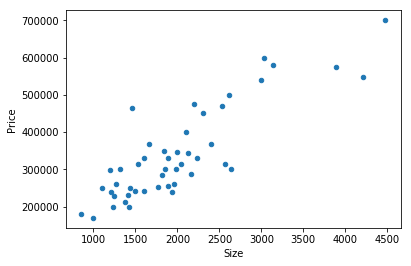

In [49]:
data.plot(kind = 'scatter', x = 'Size', y = 'Price')

In [34]:
data2 = (data - data.mean())/data.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [30]:
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [24]:
def computeCost(X, y, theta):  
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [44]:
data2.insert(0, 'Ones', 1)

cols = data2.shape[1]  
X2 = data2.iloc[:,0:cols-1]  
y2 = data2.iloc[:,cols-1:cols]

In [45]:
X2 = np.matrix(X2.values)  
y2 = np.matrix(y2.values)  
theta2 = np.matrix(np.array([0,0,0]))

In [46]:
alpha = 0.01
iters = 1000

g2, cost = gradientDescent(X2, y2, theta2, alpha, iters)
computeCost(X2, y2, g2)

0.13070336960771892

Text(0.5,1,'Error vs. Training Epoch')

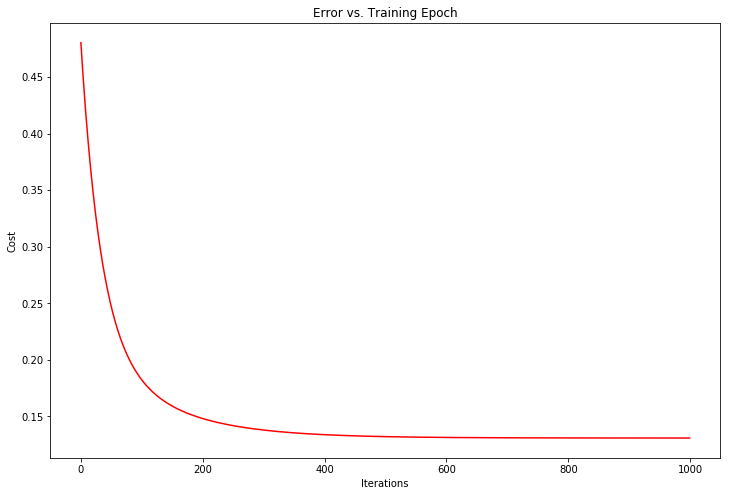

In [47]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  